In [1]:
!pip install caer canaro
!pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 76.5 MB/s eta 0:00:00


In [2]:
import os 
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset'

In [4]:
char_dict ={}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
    
# sort in descending order
char_dict= caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [5]:
characters = []
count = 0
for element in char_dict:
    characters.append(element[0]) # grabbing element's name. eg ('homer_simpson', 2246) we pick 'homer_simpson'
    count+=1
    if count >=10: 
        break 
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [6]:
train = caer.preprocess_from_dir(char_path, characters,channels=channels, IMG_SIZE=IMG_SIZE, isShuffle = True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 3.063533067703247s
[INFO] At 1000 files
[INFO] 1454 files found in 0.9079265594482422s
[INFO] At 1000 files
[INFO] 1452 files found in 1.1032466888427734s
[INFO] At 1000 files
[INFO] 1354 files found in 0.6760613918304443s
[INFO] At 1000 files
[INFO] 1342 files found in 0.5423328876495361s
[INFO] At 1000 files
[INFO] 1291 files found in 0.42227935791015625s
[INFO] At 1000 files
[INFO] 1206 files found in 0.18922829627990723s
[INFO] At 1000 files
[INFO] 1194 files found in 0.1464250087738037s
[INFO] At 1000 files
[INFO] 1193 files found in 0.14088916778564453s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0044095516204833984s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 31s


In [7]:
len(train)

13811

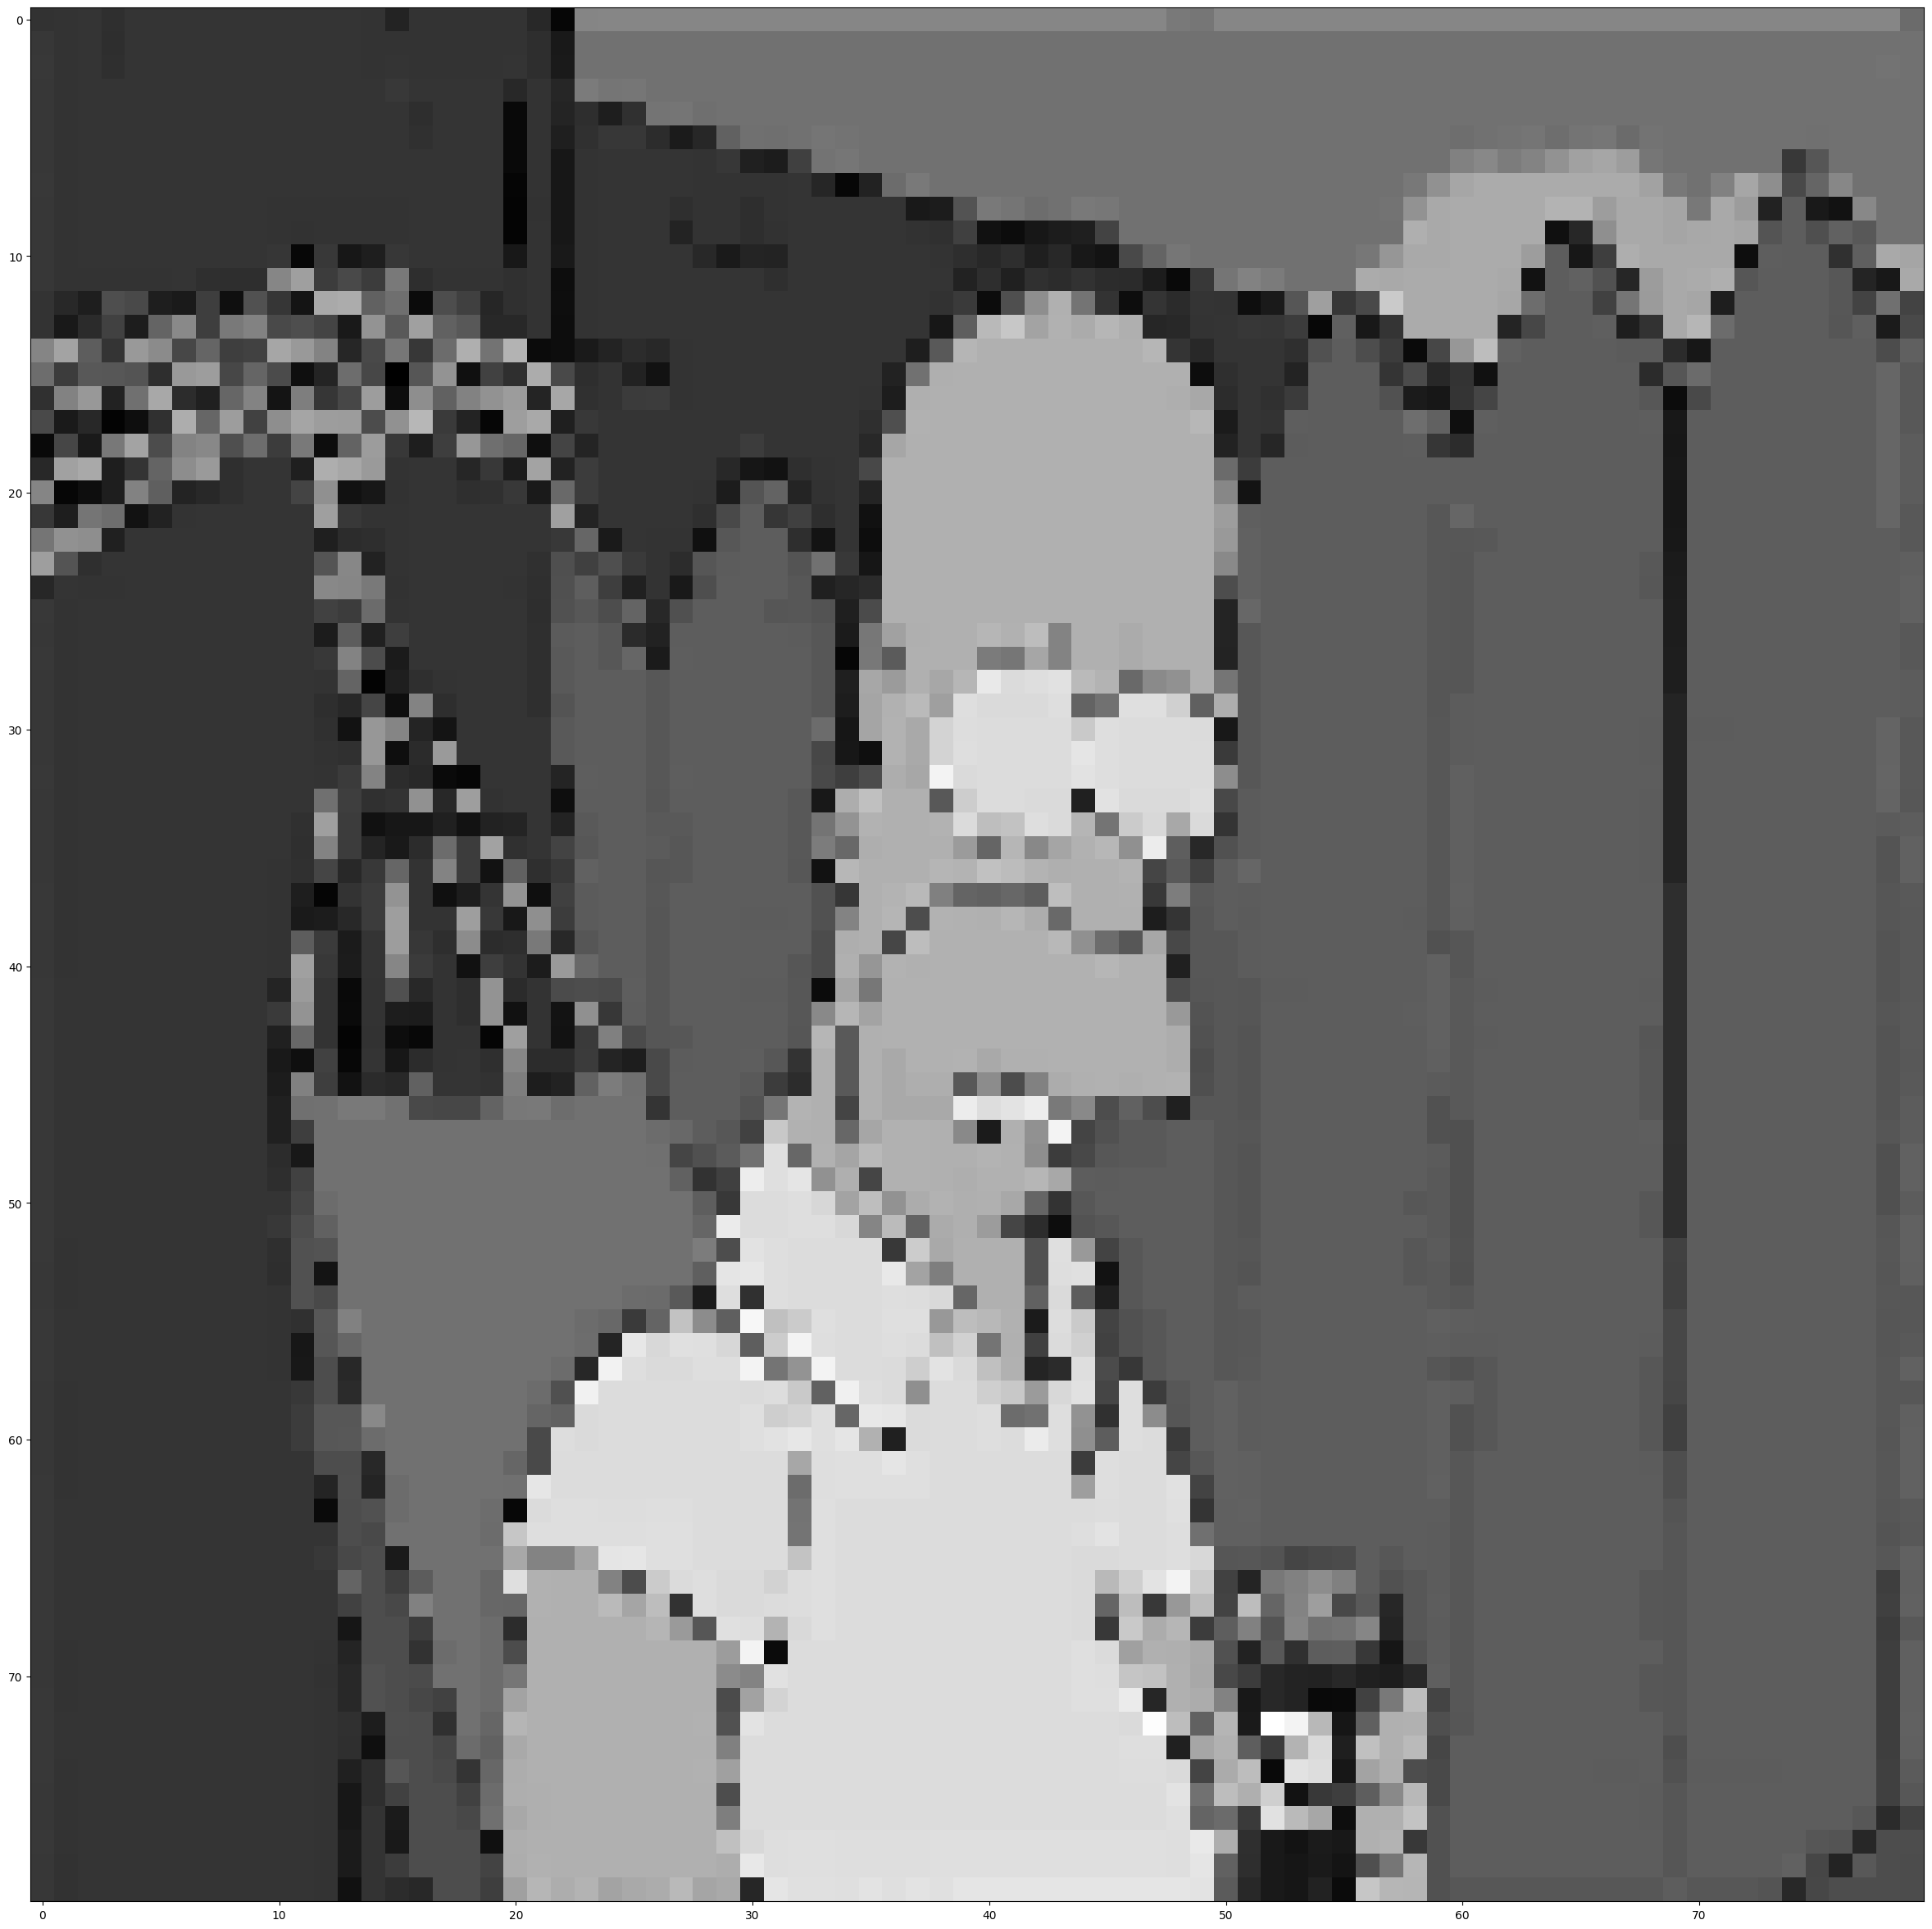

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap ='gray')
plt.show()

In [9]:

feature_set, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [10]:
from tensorflow.keras.utils import to_categorical
feature_set = caer.normalize(feature_set)
labels=to_categorical(labels, len(characters))

In [11]:
x_train,x_val, y_train, y_val = caer.train_val_split(feature_set, labels, val_ratio=.2)


In [12]:
# del train
# del feature_set
# del labels
# gc.collect()

In [13]:
BATCH_SIZE = 32
EPOCHS=10

In [14]:
# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)
